# Numerical simulations of SDE

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

#### Sources:
Pavliotis, stochastic processes and applications, Chapter 5

Hingham, 2001, An Algorithmic Introduction to Numerical Simulation of Stochastic Differential Equations, https://epubs.siam.org/doi/pdf/10.1137/S0036144500378302

Platen, 1999, An  introduction  to  numerical  methods  for stochastic  differential  equations, https://pdfs.semanticscholar.org/fbba/5c93f3021b12aceb676e18290375e5eb20c2.pdf

Holmes-Cerfon, 2017, https://cims.nyu.edu/~holmes/teaching/asa17/handout-Lecture10_2017.pdf

#### 1)  Euler-Maruyuma vs Milstein : Qualitative Assesment
We consider the SDE, whose solutions are asumed to  exist and be strongly unique.
$$dx=adt +b dW,\;\;\; x(t_0)=0$$

For $t=t_0=0...t_N=T$, and prescribe (BM) W, we write  write $\Delta_i = t_{i+1} - t_{i}$ and  $\Delta W_i = W (t_{i+1}) - W(t_{i}) \overset{law}\sim \sqrt{\Delta_i} N(0,1) $

##### Euler-Maruyama Scheme:
$$X_{n+1} = X_n + a_n \Delta_n + b_n \Delta W_n$$

##### Milstein:
$$X_{n+1} = X_n + a_n \Delta_n + b_n \Delta W_n + b_nb_n^\prime (\Delta W_n^2 -\Delta t_n^2)/2 $$

In [2]:
def Euler_Maruyama(sfunc,z0,time=np.linspace(0,1,100),W=None,args=()):
    M,NT=len(z0),len(time)
    z=np.zeros((NT,M))
    if W is None:
        W,DW=np.zeros((NT,M)),np.random.randn(NT,M)
        for i in range(NT-1): W[i+1]=W[i]+np.sqrt(time[i+1]-time[i])*DW[i]
    z[0,:]=z0
    for i in range(0,NT-1):
        tau = time[i+1]-time[i]
        drift,diffusion,dummy=sfunc(z[i,:],time[i],*args)
        z[i+1,:] = z[i,:] + drift*tau+ diffusion*(W[i+1,:]-W[i,:])
    return z

def Euler_Milstein(sfunc,z0,time=np.linspace(0,1,100),W=None,args=()):
    M,NT=len(z0),len(time)
    z=np.zeros((NT,M))
    if W is None:
        W,DW=np.zeros((NT,M)),np.random.randn(NT,M)
        for i in range(NT-1): W[i+1]=W[i]+np.sqrt(time[i+1]-time[i])*DW[i]
    z[0,:]=z0
    for i in range(0,NT-1):
        tau = time[i+1]-time[i]
        DW=W[i+1,:]-W[i,:]
        drift,diffusion,diffusionprime=sfunc(z[i,:],time[i],*args)
        z[i+1,:] = z[i,:] + drift*tau+ diffusion*DW+0.5*diffusion*diffusionprime*(DW**2-tau)
    return z 

##### Example 1: Multiplicative Brownian Motion
$$dX = \lambda X dt + \mu X dW$$

<IPython.core.display.Javascript object>


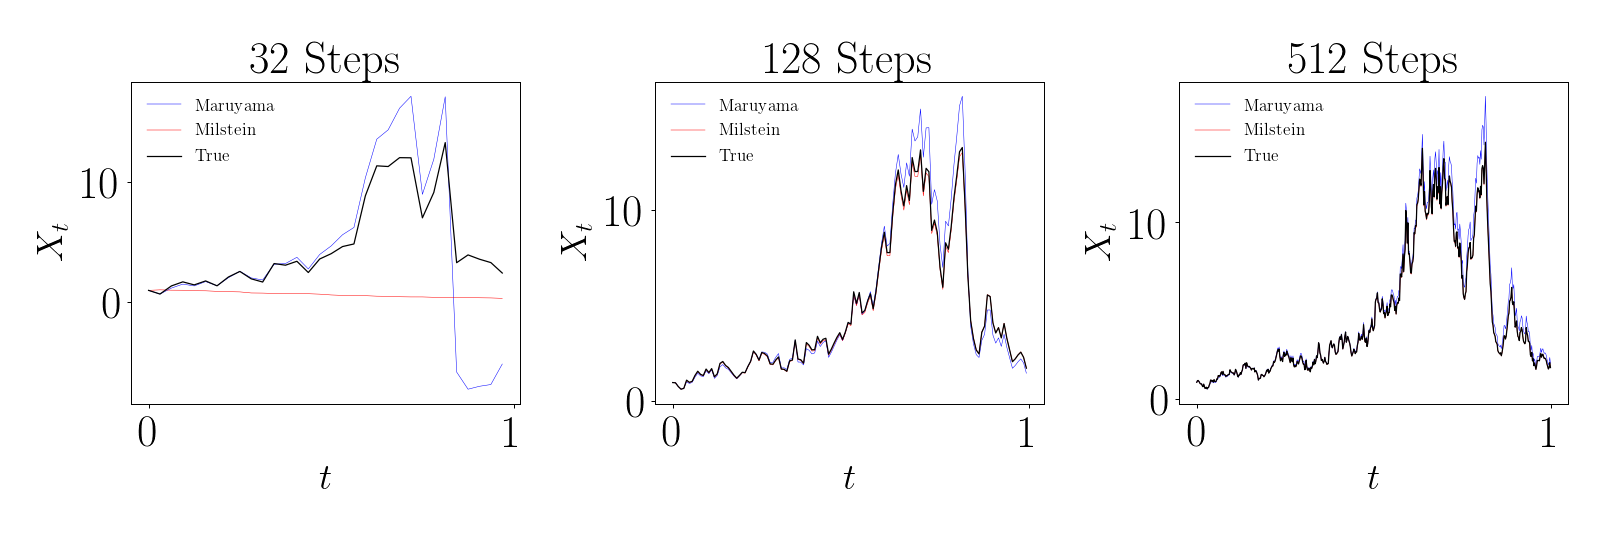

Text(0.5, 1.0, '512 Steps')

In [3]:
def MultiplicativeBM(z,t,lam=1,mu=2):
    drift,diffusion,diffusionprime=lam*z,mu*z,mu
    return drift,diffusion,diffusionprime

NT=2**11 #Timesteps
M=10 #MC sampling
lam=1
mu=2

time=np.linspace(0,1,NT)
W,DW=np.zeros((NT,M)),np.random.randn(NT,M)
for i in range(NT-1): W[i+1]=W[i]+np.sqrt(time[i+1]-time[i])*DW[i]
z0=np.random.rand(M)


fig,ax=subplots(1,3,figsize=(3*figheight,figheight),num='Samples')

every=2**6
z= Euler_Maruyama(MultiplicativeBM,z0,time=time[::every],W=W[::every,:],args=(lam,mu))
z2= Euler_Milstein(MultiplicativeBM,z0,time=time[::every],W=W,args=(lam,mu))
a=ax[0]
i=1
t=time[::every]
a.plot(t, z[:,i],'b',lw=0.4,label='Maruyama')
a.plot(t, z2[:,i],'r',lw=0.4,label='Milstein')
ztrue=z0[i]*np.exp((lam-0.5*mu**2)*t+W[::every,i]*mu)
a.plot(t, ztrue,'k',lw=1,label='True')
a.legend()
a.set_xlabel('$t$')
a.set_ylabel('$X_t$')
a.set_title('%d Steps' %(NT//every,))

every=2**4
z= Euler_Maruyama(MultiplicativeBM,z0,time=time[::every],W=W[::every,:],args=(lam,mu))
z2= Euler_Milstein(MultiplicativeBM,z0,time=time[::every],W=W[::every],args=(lam,mu))
a=ax[1]
i=1
t=time[::every]
a.plot(t, z[:,i],'b',lw=0.4,label='Maruyama')
a.plot(t, z2[:,i],'r',lw=0.4,label='Milstein')
ztrue=z0[i]*np.exp((lam-0.5*mu**2)*t+W[::every,i]*mu)
a.plot(t, ztrue,'k',lw=1,label='True')
a.legend()
a.set_xlabel('$t$')
a.set_ylabel('$X_t$')
a.set_title('%d Steps' %(NT//every,))

every=2**2
z= Euler_Maruyama(MultiplicativeBM,z0,time=time[::every],W=W[::every,:],args=(lam,mu))
z2= Euler_Milstein(MultiplicativeBM,z0,time=time[::every],W=W[::every],args=(lam,mu))
a=ax[2]
i=1
t=time[::every]
a.plot(t, z[:,i],'b',lw=0.4,label='Maruyama')
a.plot(t, z2[:,i],'r',lw=0.4,label='Milstein')
ztrue=z0[i]*np.exp((lam-0.5*mu**2)*t+W[::every,i]*mu)
a.plot(t, ztrue,'k',lw=1,label='True')
a.legend()
a.set_xlabel('$t$')
a.set_ylabel('$X_t$')
a.set_title('%d Steps' %(NT//every,))

##### Example 2: Langevin Dynamics in a Double well
$$dX = -V^\prime(X)  dt + \mu X dW$$
$$V=-a_2 x^2/2+a_3 x^ 3/3+x^4/4$$


<IPython.core.display.Javascript object>


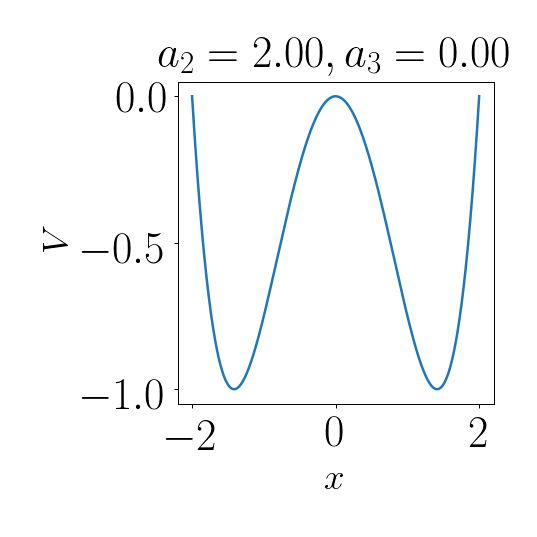

Text(0.5, 1.0, '$a_2=2.00 , a_3=0.00 $')

In [4]:
def V(x,a2=1,a3=1):
    return -a2*0.5*x**2+a3*(1/3)*x**3+0.25*x**4

def Vprime(x,a2=1,a3=1):
    return -a2*x+a3*x**2+x**3

def WwellDiff(z,t,a2=1,a3=2,mu=0):
    drift,diffusion,diffusionprime=-Vprime(z,a2,a3),mu,0
    return drift,diffusion,diffusionprime 


fig,ax=subplots(1,1,figsize=(1*figheight,figheight),num='New')
a=ax
a2=2
a3=0
x=np.linspace(-2,2,1000)
a.plot(x,V(x,a2,a3))
a.set_xlabel('$x$')
a.set_ylabel('$V$')
a.set_title('$a_2=%0.2f , a_3=%0.2f $' %(a2,a3))


<IPython.core.display.Javascript object>


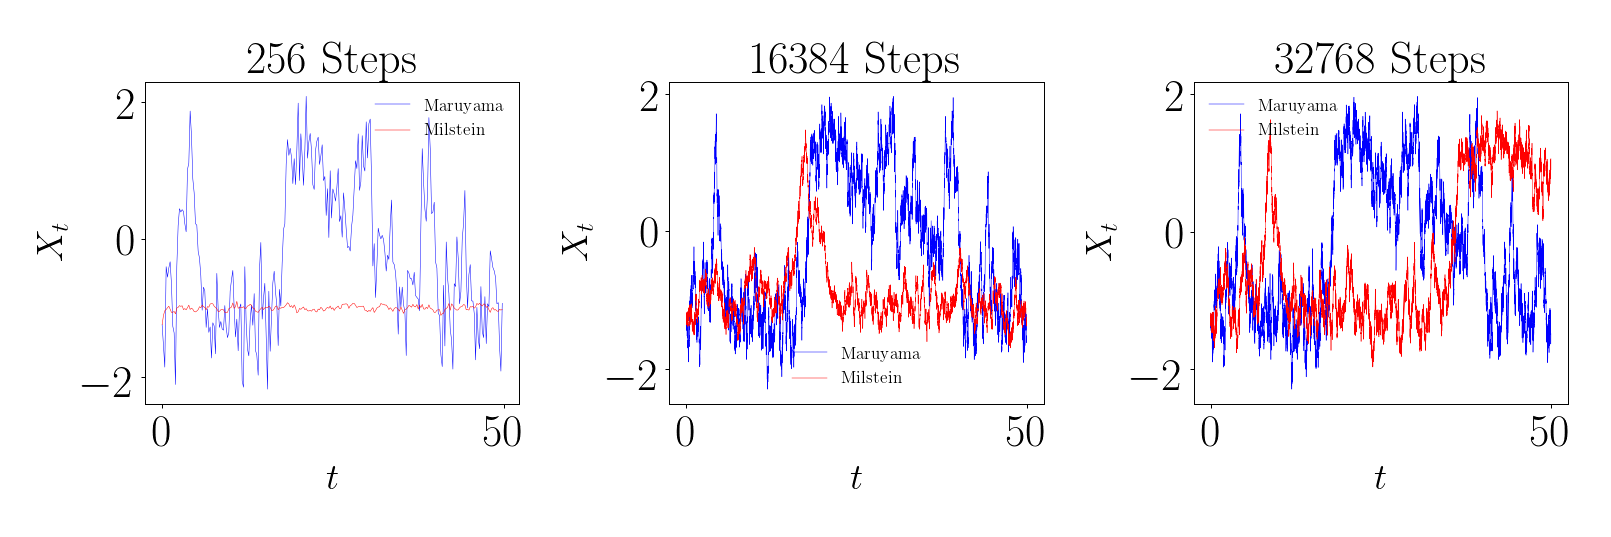

Text(0.5, 1.0, '32768 Steps')

In [5]:
def Doublewell(z,t,a2=1,a3=2):
    drift,diffusion,diffusionprime=lam*z,mu*z,mu
    return drift,diffusion,diffusionprime

NT=2**16 #Timesteps
M=15 #MC sampling
a2=1
a3=0
mu=1

time=np.linspace(0,50,NT)
W,DW=np.zeros((NT,M)),np.random.randn(NT,M)
for i in range(NT-1): W[i+1]=W[i]+np.sqrt(time[i+1]-time[i])*DW[i]
z0=np.random.randn(M)

fig,ax=subplots(1,3,figsize=(3*figheight,figheight),num='Well Samples')

every=2**8
z= Euler_Maruyama(WwellDiff,z0,time=time[::every],W=W[::every,:],args=(a2,a3,mu))
z2= Euler_Milstein(WwellDiff,z0,time=time[::every],W=W,args=(a2,a3,mu))
a=ax[0]
i=1
t=time[::every]
a.plot(t, z[:,1],'b',lw=0.4,label='Maruyama')
a.plot(t, z2[:,i],'r',lw=0.4,label='Milstein')
#ztrue=z0[i]*np.exp((lam-0.5*mu**2)*t+W[::every,i]*mu)
#a.plot(t, ztrue,'k',lw=1,label='True')
a.legend()
a.set_xlabel('$t$')
a.set_ylabel('$X_t$')
a.set_title('%d Steps' %(NT//every,))

every=2**2
z= Euler_Maruyama(WwellDiff,z0,time=time[::every],W=W[::every,:],args=(a2,a3,mu))
z2= Euler_Milstein(WwellDiff,z0,time=time[::every],W=W,args=(a2,a3,mu))
a=ax[1]
i=1
t=time[::every]
a.plot(t, z[:,1],'b',lw=0.4,label='Maruyama')
a.plot(t, z2[:,i],'r',lw=0.4,label='Milstein')
#ztrue=z0[i]*np.exp((lam-0.5*mu**2)*t+W[::every,i]*mu)
#a.plot(t, ztrue,'k',lw=1,label='True')
a.legend()
a.set_xlabel('$t$')
a.set_ylabel('$X_t$')
a.set_title('%d Steps' %(NT//every,))

every=2**1
z= Euler_Maruyama(WwellDiff,z0,time=time[::every],W=W[::every,:],args=(a2,a3,mu))
z2= Euler_Milstein(WwellDiff,z0,time=time[::every],W=W,args=(a2,a3,mu))
a=ax[2]
i=1
t=time[::every]
a.plot(t, z[:,1],'b',lw=0.4,label='Maruyama')
a.plot(t, z2[:,i],'r',lw=0.4,label='Milstein')
#ztrue=z0[i]*np.exp((lam-0.5*mu**2)*t+W[::every,i]*mu)
#a.plot(t, ztrue,'k',lw=1,label='True')
a.legend()
a.set_xlabel('$t$')
a.set_ylabel('$X_t$')
a.set_title('%d Steps' %(NT//every,))


### 2)  Euler-Maruyuma vs Milstein : Assesment of strong convergence

<IPython.core.display.Javascript object>


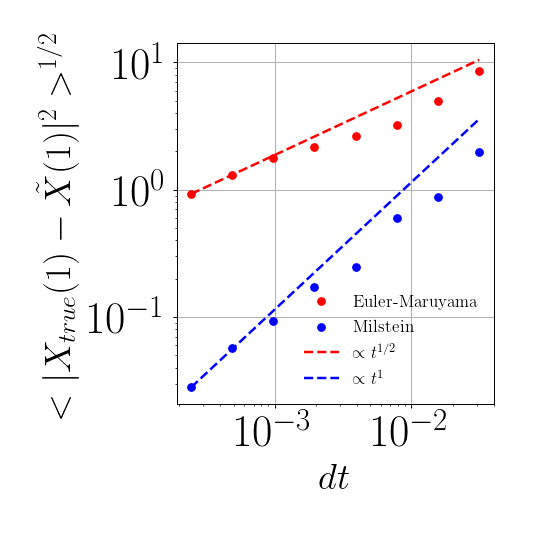

In [6]:
NT=2**12 #Timesteps
M=10000 #MC sampling

time=np.linspace(0,1,NT)
ttime=time.copy()
ttime.shape=NT,1
ttime=ttime@np.ones((1,M))

## PRESCRIBE BM
W,DW=np.zeros((NT,M)),np.random.randn(NT,M)
for i in range(NT-1): W[i+1]=W[i]+np.sqrt(time[i+1]-time[i])*DW[i]

## PRESCRIBE SDE : MODEL AND INITIAL CONDITION
lam=1
mu=2
z0=np.random.rand(M)*0+1

## STORE ERROR AND DT
err_tab,dt_tab=np.zeros((8,2)),np.zeros(8)

## COMPUTE APPROXIMATE SOLUTIONS
for i in range(8):
    every = 2**i
    z= Euler_Maruyama(MultiplicativeBM,z0,time=time[::every],W=W[::every,:],args=(lam,mu))
    z2= Euler_Milstein(MultiplicativeBM,z0,time=time[::every],W=W[::every,:],args=(lam,mu))

    ztrue=z0*np.exp((lam-0.5*mu**2)*ttime[::every,:]+W[::every,:]*mu)
    err_tab[i,0]=np.sqrt(((ztrue[-1,:]-z[-1,:])**2).mean())
    err_tab[i,1]=np.sqrt(((ztrue[-1,:]-z2[-1,:])**2).mean())

    dt_tab[i]=every/NT

#PLOT ERROR VS DT
fig,ax=subplots(1,1,figsize=(1*figheight,figheight),num='Strong Convergence')

a=ax
a.plot(dt_tab,err_tab[:,0],'ro',label='Euler-Maruyama')
a.plot(dt_tab,err_tab[:,1],'bo',label='Milstein')

a.plot(dt_tab,err_tab[0,0]*(dt_tab/dt_tab[0])**0.5,'r--',label='$\propto t^{1/2}$')
a.plot(dt_tab,err_tab[0,1]*(dt_tab/dt_tab[0])**1,'b--',label='$\propto t^{1}$')


a.set_xscale('log')
a.set_yscale('log')
a.set_xlabel('$dt$')
a.set_ylabel('$<|X_{true}(1) -\\tilde X(1)|^2>^{1/2}$')
a.legend()
a.grid()

### 2)  Euler-Maruyuma vs Milstein : Assesment of weak convergence

<IPython.core.display.Javascript object>


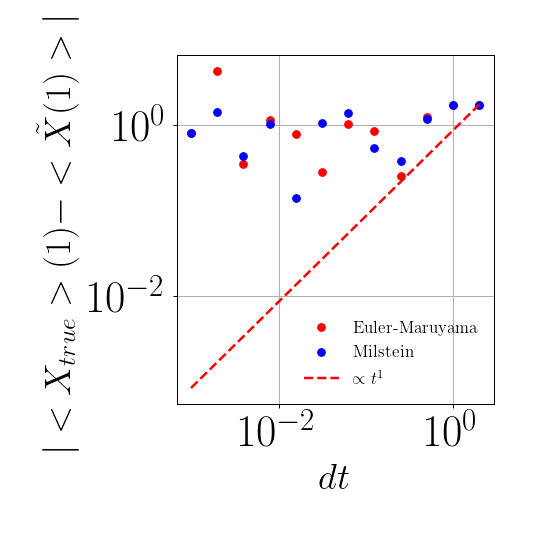

In [7]:
NT=2**10 #Timesteps
M=100 #MC sampling

time=np.linspace(0,1,NT)
ttime=time.copy()
ttime.shape=NT,1
ttime=ttime@np.ones((1,M))

## PRESCRIBE BM
W,DW=np.zeros((NT,M)),np.random.randn(NT,M)
for i in range(NT-1): W[i+1]=W[i]+np.sqrt(time[i+1]-time[i])*DW[i]

## PRESCRIBE SDE : MODEL AND INITIAL CONDITION
lam=1
mu=2
z0=np.random.rand(M)*0+1

p =1
## STORE ERROR AND DT
err_tab,dt_tab=np.zeros((12,2)),np.zeros(12)

## COMPUTE APPROXIMATE SOLUTIONS
for i in range(0,12):
    every = 2**i
    z= Euler_Maruyama(MultiplicativeBM,z0,time=time[::every],W=None,args=(lam,mu))
    z2= Euler_Milstein(MultiplicativeBM,z0,time=time[::every],W=None,args=(lam,mu))

    t0=time[::every][-1]

    ztrue=np.exp((lam-0.5*mu**2)*p + 0.5*p**2*mu**2)
    err_tab[i,0]= np.abs(ztrue-np.mean(z[-1,:]**p))
    err_tab[i,1]= np.abs(ztrue-np.mean(z2[-1,:]**p))

    dt_tab[i]=every/NT

#PLOT ERROR VS DT
fig,ax=subplots(1,1,figsize=(1*figheight,figheight),num='Weak Convergence M=100')

a=ax
a.plot(dt_tab,err_tab[:,0],'ro',label='Euler-Maruyama')
a.plot(dt_tab,err_tab[:,1],'bo',label='Milstein')

a.plot(dt_tab,err_tab[-1,0]*(dt_tab/dt_tab[-1])**1,'r--',label='$\propto t^{1}$')
#a.plot(dt_tab,err_tab[-1,1]*(dt_tab/dt_tab[-1])**1,'b--',label='$\propto t^{1}$')


a.set_xscale('log')
a.set_yscale('log')
a.set_xlabel('$dt$')
a.set_ylabel('$|<X_{true}>(1) -<\\tilde X(1)>|$')
a.legend()
a.grid()

<IPython.core.display.Javascript object>


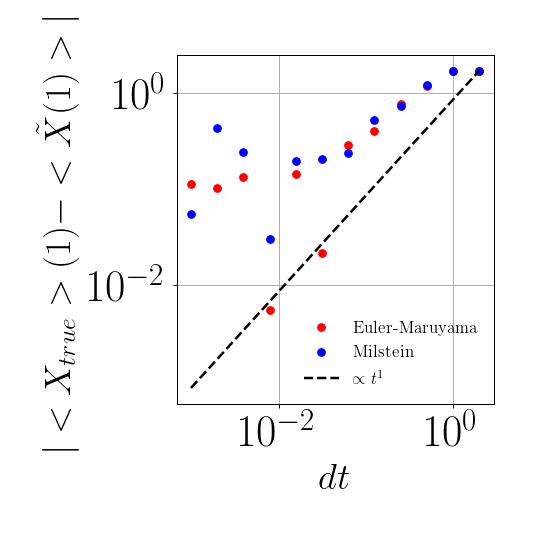

In [8]:
NT=2**10 #Timesteps
M=10000 #MC sampling

time=np.linspace(0,1,NT)
ttime=time.copy()
ttime.shape=NT,1
ttime=ttime@np.ones((1,M))

## PRESCRIBE BM
W,DW=np.zeros((NT,M)),np.random.randn(NT,M)
for i in range(NT-1): W[i+1]=W[i]+np.sqrt(time[i+1]-time[i])*DW[i]

## PRESCRIBE SDE : MODEL AND INITIAL CONDITION
lam=1
mu=2
z0=np.random.rand(M)*0+1

p =1
## STORE ERROR AND DT
err_tab,dt_tab=np.zeros((12,2)),np.zeros(12)

## COMPUTE APPROXIMATE SOLUTIONS
for i in range(0,12):
    every = 2**i
    z= Euler_Maruyama(MultiplicativeBM,z0,time=time[::every],W=None,args=(lam,mu))
    z2= Euler_Milstein(MultiplicativeBM,z0,time=time[::every],W=None,args=(lam,mu))

    t0=time[::every][-1]

    ztrue=np.exp((lam-0.5*mu**2)*p + 0.5*p**2*mu**2)
    err_tab[i,0]= np.abs(ztrue-np.mean(z[-1,:]**p))
    err_tab[i,1]= np.abs(ztrue-np.mean(z2[-1,:]**p))

    dt_tab[i]=every/NT

#PLOT ERROR VS DT
fig,ax=subplots(1,1,figsize=(1*figheight,figheight),num='Weak Convergence M=10000')

a=ax
a.plot(dt_tab,err_tab[:,0],'ro',label='Euler-Maruyama')
a.plot(dt_tab,err_tab[:,1],'bo',label='Milstein')

a.plot(dt_tab,err_tab[-1,0]*(dt_tab/dt_tab[-1])**1,'k--',label='$\propto t^{1}$')
#a.plot(dt_tab,err_tab[-1,1]*(dt_tab/dt_tab[-1])**1,'b--',label='$\propto t^{1}$')


a.set_xscale('log')
a.set_yscale('log')
a.set_xlabel('$dt$')
a.set_ylabel('$|<X_{true}>(1) -<\\tilde X(1)>|$')
a.legend()
a.grid()

In [15]:
%%html
<style>.container { width:99% !important; }</style>

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>